# QSCOUT Optimizations with Cirq

Below is a brief tutorial on SuperstaQ optimizations for QSCOUT. For more information on QSCOUT, visit their website [here](https://www.sandia.gov/quantum/quantum-information-sciences/projects/qscout/). For those who'd like to follow along, try the code out on our [Jupyter Hub](https://tinyurl.com/2p9dtyxj).

## Imports and Token

In [1]:
import os
import numpy as np
import cirq
import cirq_superstaq as css

To set your SuperstaQ API key: in a terminal, `cd` to where your notebook is saved and run `$ export SUPERSTAQ_API_KEY="<token>"`.

## Circuit Compilation

In [55]:
# get service
service = css.Service()

In [56]:
# create circuit
theta = np.random.uniform(0, 4 * np.pi)
qubits = cirq.LineQubit.range(2)
circuit1 = cirq.Circuit(
    cirq.CX(qubits[0], qubits[1]),
    cirq.rz(theta).on(qubits[1]),
    cirq.CX(qubits[0], qubits[1]),
    cirq.measure(qubits[0], qubits[1]),
)

print(circuit1)

0: ───@───────────────@───M───
      │               │   │
1: ───X───Rz(1.97π)───X───M───


In [57]:
# compile with qscout compile
compiler_output = service.qscout_compile(circuit1)
print(compiler_output.circuit)

0: ───PhX(0.5)^0.5───Z──────MS(-0.0155π)───PhX(0.5)^0.5───Z───M───
                            │                                 │
1: ───PhX(0)^0.5─────S^-1───MS(-0.0155π)───PhX(0.5)^0.5───S───M───


In [58]:
# get jaqal program
print(compiler_output.jaqal_program)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 1.5707963267948966 1.5707963267948966
	R allqubits[1] 0.0 1.5707963267948966
>
<
	Rz allqubits[0] -3.141592653589793
	Rz allqubits[1] -1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -0.0974782366174456
<
	R allqubits[0] 1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] -3.141592653589793
	Rz allqubits[1] 1.5707963267948966
>
measure_all



## Multiple Circuits

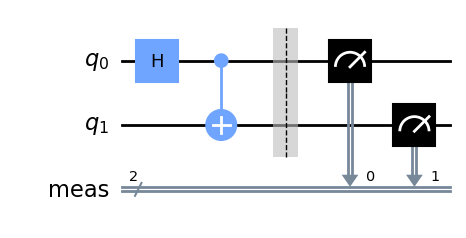

In [63]:
# create second circuit
circuit2 = qiskit.QuantumCircuit(2)
circuit2.h(0)
circuit2.cx(0, 1)
circuit2.measure_all()

# draw second circuit
circuit2.draw("mpl")

In [64]:
# create list of circuits
circuit_list = [circuit1, circuit2]

# compile list of circuits
compiler_output = provider.qscout_compile(circuit_list)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 0.0 1.5707963267948966
	R allqubits[1] 3.141592653589793 1.5707963267948966
>
<
	Rz allqubits[0] -1.5707963267948966
	Rz allqubits[1] 1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -0.8363301408134519
<
	R allqubits[0] 1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] -1.5707963267948966
	Rz allqubits[1] 1.5707963267948966
>
measure_all



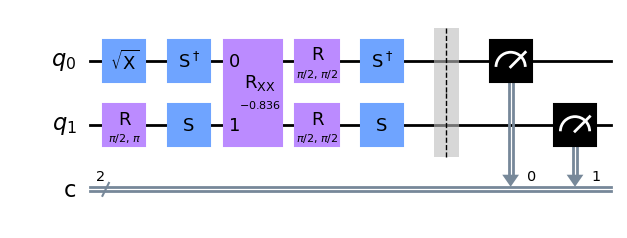

In [65]:
# draw and get jaqal program of first circuit
print(compiler_output.jaqal_programs[0])
compiler_output.circuits[0].draw("mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 3.141592653589793 2.356194490192345
	R allqubits[1] 3.141592653589793 2.356194490192345
>
MS allqubits[0] allqubits[1] 0 -1.5707963267948966
<
	R allqubits[1] 3.141592653589793 2.356194490192345
	R allqubits[0] -1.5707963267948966 1.5707963267948966
>
Rz allqubits[0] 0.7853981633974476
measure_all



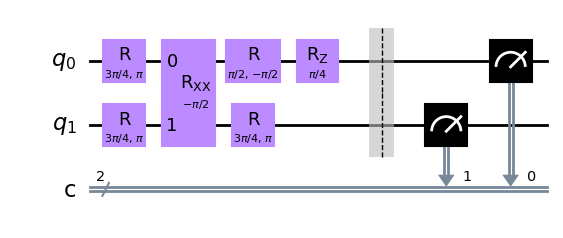

In [66]:
# draw and get jaqal program of second circuit
print(compiler_output.jaqal_programs[1])
compiler_output.circuits[1].draw("mpl")

## Entangling Basis Compilation

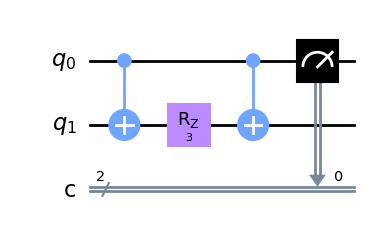

In [67]:
# create circuit
theta = np.random.uniform(0, np.pi)
circuit = qiskit.QuantumCircuit(2, 2)
circuit.cx(0, 1)
circuit.rz(theta, 1)
circuit.cx(0, 1)
circuit.measure(0, 0)

# draw circuit
circuit.draw(output="mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 1.3036625220154938 1.5707963267948966
	R allqubits[1] -0.26713380477940285 1.5707963267948966
>
<
	Rz allqubits[0] -2.8744588488103906
	Rz allqubits[1] -1.3036625220154923
>
MS allqubits[0] allqubits[1] 0 -0.14028377608634157
<
	R allqubits[0] 1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] -0.26713380477940424
	Rz allqubits[1] -1.8379301315743009
>
measure_all



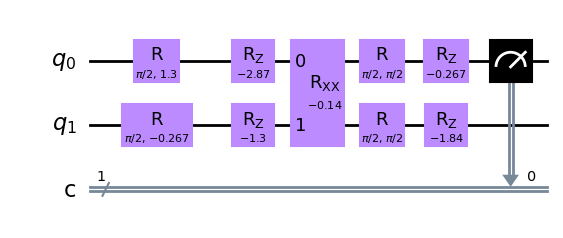

In [68]:
# compile with xx entangling basis
compiler_output = provider.qscout_compile(circuit, base_entangling_gate="xx")

# get jaqal program and draw circuit
print(compiler_output.jaqal_program)
compiler_output.circuit.draw(output="mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 1.437229424405195 3.141592653589793
	R allqubits[1] -2.489761392582046 3.141592653589793
>
ZZ allqubits[0] allqubits[1] -0.14028377608634157
<
	R allqubits[0] 3.008025751200091 3.141592653589793
	R allqubits[1] 2.2226275878026427 3.141592653589793
>
measure_all



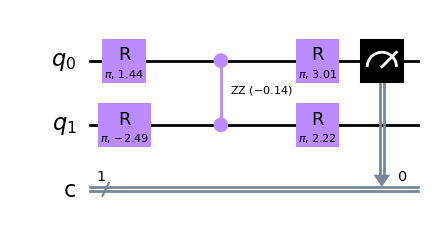

In [69]:
# compile with zz entangling basis
compiler_output = provider.qscout_compile(circuit, base_entangling_gate="zz")

# get jaqal program and draw circuit
print(compiler_output.jaqal_program)
compiler_output.circuit.draw(output="mpl")

## Swap Mirroring

### Create random QV circuit

In [70]:
# get random two-qubit circuit
circ = qiskit.circuit.library.QuantumVolume(2, 1, seed=123)
circ.measure_all()

### Compile without swap mirroring

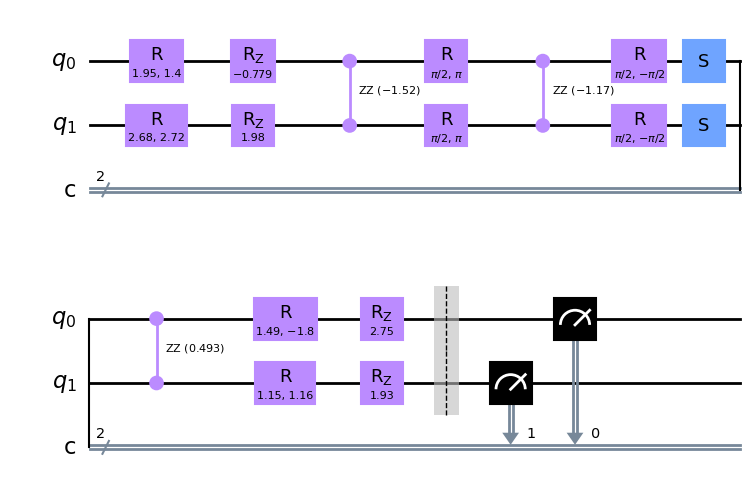

In [71]:
# compile with no swap mirroring
output_nsm = provider.qscout_compile(circ, mirror_swaps=False, base_entangling_gate="zz")

# draw circuit
circ_nsm = output_nsm.circuit
circ_nsm.draw("mpl", fold=10)

### Compile with swap mirroring

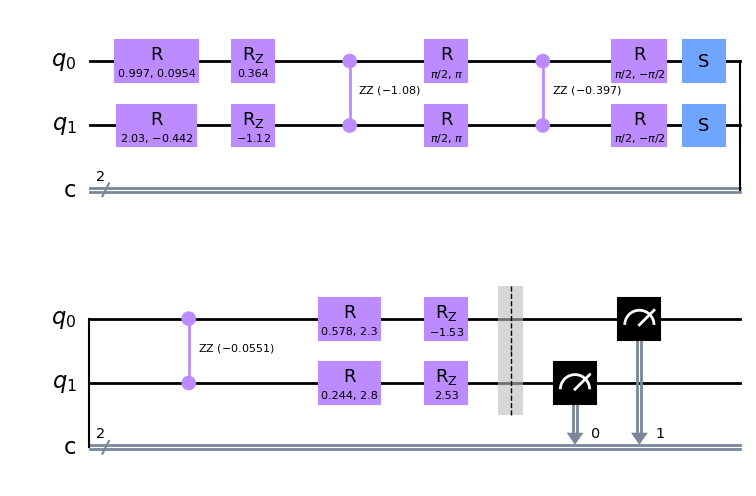

In [72]:
# compile with swap mirroring
output_wsm = provider.qscout_compile(circ, mirror_swaps=True, base_entangling_gate="zz")

# draw circuit
circ_wsm = output_wsm.circuit
circ_wsm.draw("mpl", fold=10)

### Return final logical to physical qubit mapping

In [73]:
# return final qubit map for non swap-mirrored circuit
map_nsm = output_nsm.final_logical_to_physical
print("Non swap-mirrored mapping:", map_nsm)

# return final qubit map for swap-mirrored circuit
map_wsm = output_wsm.final_logical_to_physical
print("Swap-mirrored mapping:", map_wsm)

Non swap-mirrored mapping: None
Swap-mirrored mapping: None


## Simulator

In [74]:
superstaq = qss.superstaq_provider.SuperstaQProvider()
backend = superstaq.get_backend("sandia_qscout_qpu")
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
job = backend.run(qc, shots=100, method="dry-run")
print(job.result().get_counts())

{'00': 40, '11': 60}
